# Credit Card Fraud

## Project Description
The objective of this project is to build and train a machine learning model based on supervised learning classification techniques and algorithms that are capable of recognizing the fraudulency of a credit card transaction. 

In [160]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

## Data pre-processing

### Checking the data

Before starting to use a new data set, it should always be checked if it is in proper shape, that is, if it does not have many missing values, is well formated, etc.

In [161]:
data_set = pd.read_csv('../data/card_transdata.csv')
data_set.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


The dataset seems to be in good state.

In [162]:
data_set.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


### Checking for missing values

One of the problems that often arises is empty values in a data set. 

In [163]:
data_set.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Thankfully our dataset is totally complete.

### Checking for outliers and other errors

Datasets may contain other erroneous data that not a null value. These errors often manifest themselves as outliers: values that stray far away from the majority of the entries in our sample. 

#### Outliers in continuous attributes
To check for outliers, boxplots may be useful.

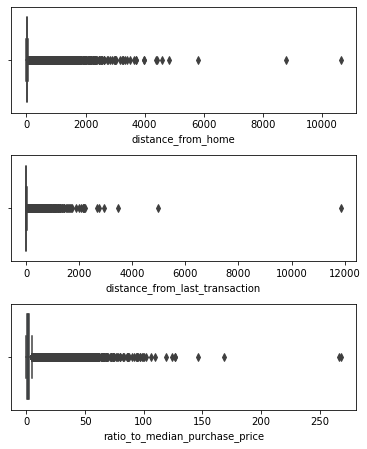

In [164]:
fig, ax = plt.subplots(3)

sb.boxplot(x=data_set["distance_from_home"], orient="h", ax=ax[0])
sb.boxplot(x=data_set["distance_from_last_transaction"], orient="h", ax=ax[1])
sb.boxplot(x=data_set["ratio_to_median_purchase_price"], orient="h", ax=ax[2])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)

As shown in the image above, there are so many outliers that the box plot is barely recognizable. The next step is to recognize if they represent errors or not.

In [165]:
# Negative distances are an error, distances bigger than half the perimeter of the equatorial circumference are also an error
data_set[(data_set.distance_from_last_transaction < 0) | (data_set.distance_from_last_transaction > 20000)]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


By analysing the previous graphic we cannot conclude anything because we clearly see that there are two outliers in the data but these outliers can be correct, for instance if a student is studying abroad and doing transactions.

In [166]:
# Negative distances are an error, distances bigger than half the perimeter of the equatorial circumference are also an error
data_set[(data_set.distance_from_home < 0) | (data_set.distance_from_home> 20000)]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


In [167]:
# Negative ratios are an error
data_set[(data_set.ratio_to_median_purchase_price < 0)]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


As no values in the continuous attributes are impossible, and we cannot contact the supplier of the data set to investigate the values origins, we will assume there are no errors.

#### Outliers in discrete attributes

In these discrete values, all we can check is whether they are indeed discrete or there is any wrong entry.

In [168]:
print(data_set["repeat_retailer"].value_counts())
print(data_set["used_chip"].value_counts())
print(data_set["used_pin_number"].value_counts())
print(data_set["online_order"].value_counts())
print(data_set["fraud"].value_counts())

1.0    881536
0.0    118464
Name: repeat_retailer, dtype: int64
0.0    649601
1.0    350399
Name: used_chip, dtype: int64
0.0    899392
1.0    100608
Name: used_pin_number, dtype: int64
1.0    650552
0.0    349448
Name: online_order, dtype: int64
0.0    912597
1.0     87403
Name: fraud, dtype: int64


On the discrete attributes there does not seem to exist any problem either.

### Tidying up

The data set is clean and valid. The only operation we will be applying is change the values of the discrete variables to boolean, as they are all binary.

In [169]:
data_set['fraud'] = data_set['fraud'].astype('int')
data_set['online_order'] = data_set['online_order'].astype('int')
data_set['used_pin_number'] = data_set['used_pin_number'].astype('int')
data_set['used_chip'] = data_set['used_chip'].astype('int')
data_set['repeat_retailer'] = data_set['repeat_retailer'].astype('int')
data_set.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


## Exploratory Data Analysis

The second step is to analyse the data in order to infer relationships between the attributes and understand the data better.

Our data set is composed of various continuous and discrete attributes that can be indicative of fraud, as well as a label attribute (fraud). The label is the attribute we seek to train our model to predict.

Using [pandas.DataFrame.describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) we can get a quick overview of some statistics of our data set.

In [170]:
data_set.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


From this table it can be infered that:
- all continuous attributes have relatively high max values taking into account their mean and mode
- a relatively low ammount of data amounts to fraudulent entries from the fraud's mean value
- most transactions occurs in less than 25 km from the place of last transaction or home
- most transactions do not vary too much from the median purchase price, being the average to be slightly above it
- etc.

 -> we assumed the distances were in kms

Plotting can be a very useful tool for analyzing data. Using [seaborn](https://seaborn.pydata.org/index.html) and [matplotlib](https://matplotlib.org/) libraries:

<AxesSubplot:xlabel='fraud', ylabel='count'>

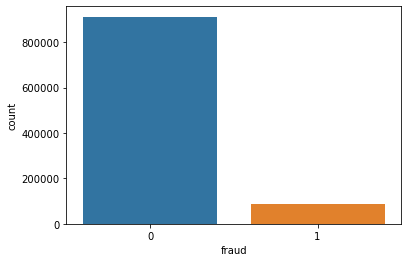

In [171]:
sb.countplot(x=data_set.fraud)

The image above reveals that our data set is moderately unbalanced. This discovery is important and determinant in our approach and model choice.

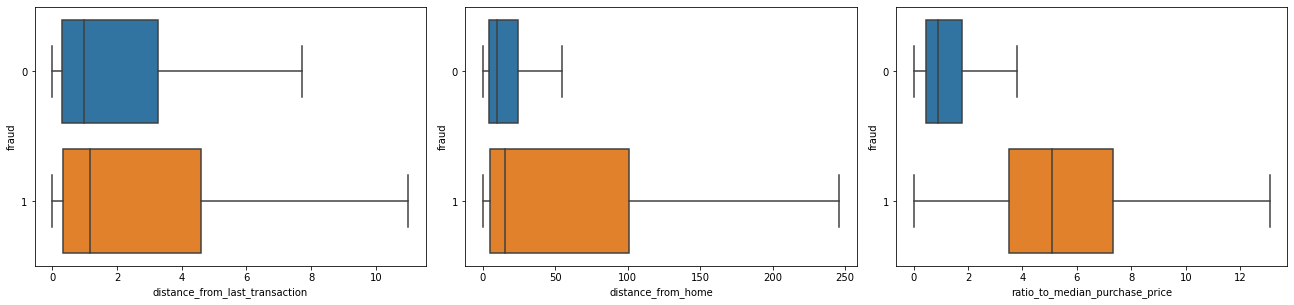

In [172]:
fig, ax = plt.subplots(1, 3)
sb.boxplot(x=data_set["distance_from_last_transaction"], y=data_set["fraud"], orient="h", showfliers=False, ax=ax[0])
sb.boxplot(x=data_set["distance_from_home"], y=data_set["fraud"], orient="h", showfliers=False, ax=ax[1])
sb.boxplot(x=data_set["ratio_to_median_purchase_price"], y=data_set["fraud"], orient="h", showfliers=False, ax=ax[2])


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=3, 
                    top=1, 
                    wspace=0.1, 
                    hspace=0.5)

From these boxplots it can be inferred that:
- fraudulent transactions have a slight tendency to happen further from the last transaction than normal ones
- fraudulent transactions have a slight tendency to happen further from home than normal ones
- fraudulent transactions have tendency to be more pricey than normal ones

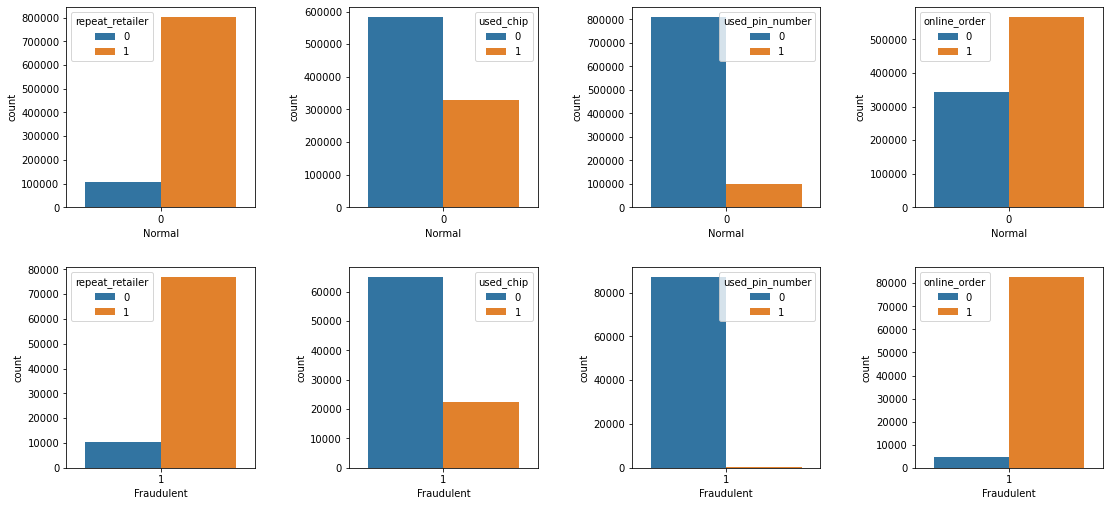

In [173]:
fig, ax = plt.subplots(2, 4, figsize=(18, 8))
sb.countplot(data=data_set[data_set.fraud == 0], x="fraud", hue="repeat_retailer", ax=ax[0][0]).set_xlabel("Normal")
sb.countplot(data=data_set[data_set.fraud == 1], x="fraud", hue="repeat_retailer", ax=ax[1][0]).set_xlabel("Fraudulent")
sb.countplot(data=data_set[data_set.fraud == 0], x="fraud", hue="used_chip", ax=ax[0][1]).set_xlabel("Normal")
sb.countplot(data=data_set[data_set.fraud == 1], x="fraud", hue="used_chip", ax=ax[1][1]).set_xlabel("Fraudulent")
sb.countplot(data=data_set[data_set.fraud == 0], x="fraud", hue="used_pin_number", ax=ax[0][2]).set_xlabel("Normal")
sb.countplot(data=data_set[data_set.fraud == 1], x="fraud", hue="used_pin_number", ax=ax[1][2]).set_xlabel("Fraudulent")
sb.countplot(data=data_set[data_set.fraud == 0], x="fraud", hue="online_order", ax=ax[0][3]).set_xlabel("Normal")
sb.countplot(data=data_set[data_set.fraud == 1], x="fraud", hue="online_order", ax=ax[1][3]).set_xlabel("Fraudulent")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.3)


These count plots allow for certain conclusions:
- the fact that the retailer is repeated seems to have little to no relationship with fraudulency
- the percentage of transactions using chip is slightly higher in normal transactions
- the percentage of transactions using pin number is higher in normal transactions
- the ratio of in loco to online transactions is greater in normal transactions. 

<AxesSubplot:>

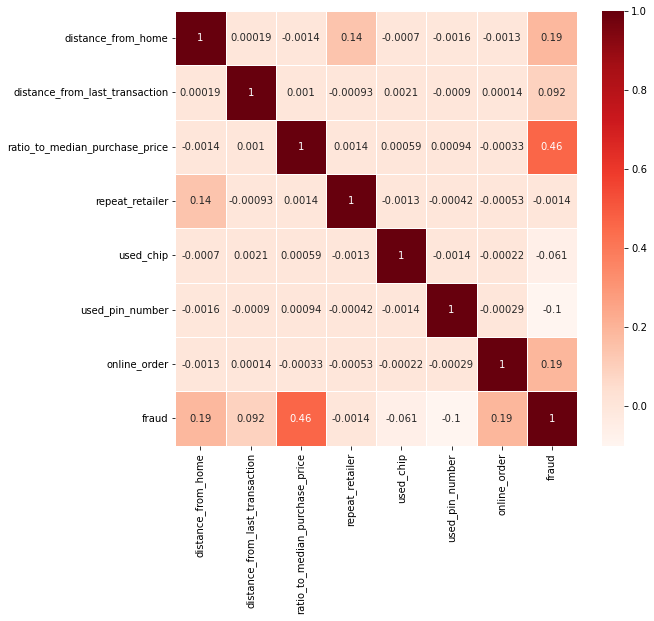

In [174]:
correlation_mat = data_set.corr() 
f, ax = plt.subplots(figsize=(9, 8)) 
sb.heatmap(correlation_mat,ax=ax, annot=True, cmap="Reds", linewidths=0.5)

A correlation matrix allows to see which attributes have higher correlation value, meaning statistical they move in coordination to one another in a higher degree. The matrix shows us that the attribute which has greatest correlation value with 'fraud' is 'ratio_to_median_purchase_price', folllowed by 'distance_from_home' and 'online_order'.

### Conclusions

From this exploratory analysis we were able to conclude:
- The data set is moderately unbalenced
- Which are the attributes that are more closely related with fraudulent activity
- The date set has a great number of outliers (already concluded in the previous section)

## Training the data set


We will use a Stratified **10-Fold cross validation** to test the alogirthms and use the **area under the Roc Curve** to score it. We will also resort to using a **gridsearch**, in order to find the best set of parameters for the model.

As our dataset is imbalanced, which may present as a problem to most classification algorithms, we will resort to oversampling techniques such as **SMOTE** - Synthetic Minority Over-sampling Technique.

In order to fight the imbalance in the data set, we will also try the approach of applying different **class weights**, using grid search, which will increase the importance of a misclassification in a certain class over the other(s).

To evaluate the models generated, we will resort mainly to recall, roc_auc and balanced_accuracy measures, which are adequate for imbalanced datasets. We will also use some other ones but will take their values as less important.

**NOTE:** 
 - we are training the models with a reduced data set because of lack of processing power to experiment all possibilities with full data set

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_auc_score, make_scorer, recall_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, accuracy_score, balanced_accuracy_score
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
import pickle
import time
from pathlib import Path

### Common Code and Utilities

In [176]:
def pickle_model(model, name):
    with open('models/{0}'.format(name), 'wb') as f:
        pickle.dump(model, f)

def unpickle_model(name):
    with open('models/{0}'.format(name), 'rb') as f:
        return pickle.load(f)

In [177]:
def print_grid_results(grid_search: GridSearchCV, dataset_name, labels_test, labels_pred, algorithm_name, time_to_train, time_to_predict, save: bool):
    recall = recall_score(labels_test, labels_pred)
    roc_auc = roc_auc_score(labels_test, labels_pred)
    precision = precision_score(labels_test, labels_pred)
    accuracy = accuracy_score(labels_test, labels_pred)
    balanced_accuracy = balanced_accuracy_score(labels_test, labels_pred)
    matrix = confusion_matrix(labels_test, labels_pred)
    print(dataset_name + ' best score:', grid_search.best_score_)
    print(dataset_name + ' best parameters:', grid_search.best_params_)
    print(dataset_name + ' roc_auc score against test set:',  roc_auc)
    print(dataset_name + ' recall score against test set:',  recall)
    print(dataset_name + ' precision score against test set:', precision)
    print(dataset_name + ' accuracy score against test set:', accuracy)
    print(dataset_name + ' balanced accuracy score against test set:', balanced_accuracy)
    ConfusionMatrixDisplay(confusion_matrix=matrix).plot()
    print()
    if (save):
        with open('../data/performance.csv', 'a', encoding='UTF8') as f:
            f.write(algorithm_name + ',' + str(time_to_train) + ',' + str(time_to_predict) + ',' +
             str(recall) + ',' + str(roc_auc) + ',' + str(precision) + ',' + str(accuracy) + ',' + str(balanced_accuracy) + '\n')


In [178]:
def clear_performance_registry():
    with open('../data/performance.csv', 'w', encoding='UTF8') as f:
        f.write("model,time_to_train,time_to_test,recall,roc_auc,precision,accuracy,balanced_accuracy\n")

def performance_registry(algorithm_name, time_to_train, time_to_predict):
    with open('../data/performance.csv', 'a', encoding='UTF8') as f:
        f.write(algorithm_name + ',' + str(time_to_train) + ',' + str(time_to_predict) + '\n')

**Grid Search Function**

In [179]:
def grid_search_train_and_test(model_name: str, pipeline: Pipeline, parameter_grid, inputs_train, labels_train, inputs_test, labels_test):
    file_exists = Path('models/' + model_name + '.sav').is_file() 

    time_to_train = 0

    # Training
    if (not file_exists):
        print("Training...")
        t = time.perf_counter()
        grid_search = GridSearchCV(pipeline, param_grid=parameter_grid, n_jobs=-1,
                                cv=StratifiedKFold(10), scoring=make_scorer(roc_auc_score),
                                return_train_score=True).fit(inputs_train, labels_train)
        time_to_train = time.perf_counter() - t
        pickle_model(grid_search, model_name + '.sav')

    # Testing
    grid_search = unpickle_model(model_name + '.sav')
    print("Testing...")
    t = time.perf_counter()
    labels_pred = grid_search.predict(inputs_test)
    time_to_predict = time.perf_counter() - t

    # Print and save results
    print_grid_results(grid_search, model_name, labels_test, labels_pred, model_name, time_to_train, time_to_predict, not file_exists)

### Creation of sample sets

We will use smaller datasets to test a larger combination of parameters in grid search.

In [180]:
data_set_sample_01 = data_set.sample(frac=0.001)
data_set_sample_1 = data_set.sample(frac=0.01)
data_set_sample_10 = data_set.sample(frac=0.1)

all_inputs = data_set[['distance_from_home', 'distance_from_last_transaction',
 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
 'used_pin_number', 'online_order']].values
all_labels = data_set['fraud'].values

inputs_1p = data_set_sample_1[['distance_from_home', 'distance_from_last_transaction',
 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
 'used_pin_number', 'online_order']].values
labels_1p = data_set_sample_1['fraud'].values

inputs_01p = data_set_sample_01[['distance_from_home', 'distance_from_last_transaction',
 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
 'used_pin_number', 'online_order']].values
labels_01p = data_set_sample_01['fraud'].values

inputs_10p = data_set_sample_10[['distance_from_home', 'distance_from_last_transaction',
 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
 'used_pin_number', 'online_order']].values
labels_10p = data_set_sample_10['fraud'].values

We may remove columns from the data set that have little relation to the label. The smaller number of columns will decrease the training time and possibly increase its performance.

In [181]:
feat_selection = SelectKBest(score_func=f_classif, k=7).fit(all_inputs, all_labels)
for i in range(len(data_set.columns) - 1):
    print ("Feature:", data_set.columns[i], "| Score:", feat_selection.scores_[i])


Feature: distance_from_home | Score: 36465.693325861415
Feature: distance_from_last_transaction | Score: 8520.690791240224
Feature: ratio_to_median_purchase_price | Score: 271820.17383321305
Feature: repeat_retailer | Score: 1.8426704993310303
Feature: used_chip | Score: 3731.768465419502
Feature: used_pin_number | Score: 10160.776030226083
Feature: online_order | Score: 38263.518281433026


In [182]:
worst = list(feat_selection.scores_).index(min(feat_selection.scores_))
all_inputs_selected = data_set.drop(data_set.columns[worst], axis=1).drop('fraud', axis=1).values
inputs_10p_selected = data_set_sample_10.drop(data_set.columns[worst], axis=1).drop('fraud', axis=1).values
inputs_1p_selected = data_set_sample_1.drop(data_set.columns[worst], axis=1).drop('fraud', axis=1).values

In [183]:
file_exists = Path('../data/data_arrays/all_inputs_train.sav').is_file() 
print(file_exists)
if (not file_exists):
    print('UPS')
    clear_performance_registry()
    all_inputs_train, all_inputs_test, all_labels_train, all_labels_test = train_test_split(all_inputs, all_labels, random_state=42)
    with open('../data/data_arrays/all_inputs_train.sav', 'wb') as f:
        pickle.dump(all_inputs_train, f)
    with open('../data/data_arrays/all_inputs_test.sav', 'wb') as f:
        pickle.dump(all_inputs_test, f)
    with open('../data/data_arrays/all_labels_train.sav', 'wb') as f:
        pickle.dump(all_labels_train, f)
    with open('../data/data_arrays/all_labels_test.sav', 'wb') as f:
        pickle.dump(all_labels_test, f)
with open('../data/data_arrays/all_inputs_train.sav', 'rb') as f:
    all_inputs_train = pickle.load(f)
with open('../data/data_arrays/all_inputs_test.sav', 'rb') as f:
    all_inputs_test = pickle.load(f)
with open('../data/data_arrays/all_labels_train.sav', 'rb') as f:
    all_labels_train = pickle.load(f)
with open('../data/data_arrays/all_labels_test.sav', 'rb') as f:
    all_labels_test = pickle.load(f)

True


### Logistic Regression

Logistic Regression is a great algorithm for binary classification. However, it does not behave well with unbalanced datasets and irrelevant or highly correlated features. For this reason, we will use an oversampling technique called **SMOTE**. This will balance the training set used to train the Logistic Regression model. We will also train the dataset with a dataset with one less column which seemed irrelevant. 

In [184]:
smote_pipeline = make_pipeline(SMOTE(random_state=42),
                              MinMaxScaler(),
                              LogisticRegression(max_iter=400000, n_jobs=4))
normal_pipeline = make_pipeline(MinMaxScaler(),
                              LogisticRegression(max_iter=400000, n_jobs=4))

#### 1 Percent data set

In [185]:
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs_1p, labels_1p, random_state=42)
inputs_train_selected, inputs_test_selected, labels_train_selected, labels_test_selected = train_test_split(inputs_1p_selected, labels_1p, random_state=42)

**Logistic Regression with Smote - 1 Percent**

Testing...
lr_smoted_1p best score: 0.9382817583118278
lr_smoted_1p best parameters: {'logisticregression__C': 100, 'logisticregression__class_weight': {1.0: 2}, 'logisticregression__solver': 'newton-cg'}
lr_smoted_1p roc_auc score against test set: 0.9496737953409983
lr_smoted_1p recall score against test set: 0.981042654028436
lr_smoted_1p precision score against test set: 0.5253807106598984
lr_smoted_1p accuracy score against test set: 0.9236
lr_smoted_1p balanced accuracy score against test set: 0.9496737953409983

Testing...
lr_selected_smoted_1p best score: 0.9378526397064372
lr_selected_smoted_1p best parameters: {'logisticregression__C': 100000, 'logisticregression__class_weight': {1.0: 2}, 'logisticregression__solver': 'newton-cg'}
lr_selected_smoted_1p roc_auc score against test set: 0.9466156913654631
lr_selected_smoted_1p recall score against test set: 0.981042654028436
lr_selected_smoted_1p precision score against test set: 0.5073529411764706
lr_selected_smoted_1p accuracy

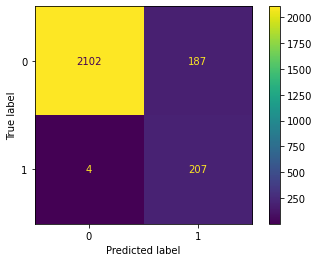

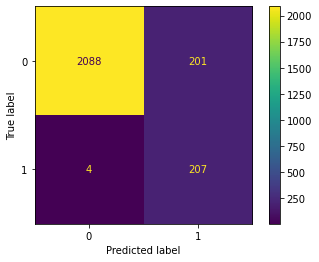

In [186]:
params = {
    'C': [100000, 10000, 100, 1, 0.1, 0.01],
    'solver': ['newton-cg', 'lbfgs'],
    'class_weight': [{1.0: 0.5}, {1.0: 1}, {1.0: 2}, {1.0: 4}, {1.0: 8}, {1.0: 16}]
}
param_grid = {'logisticregression__' + key: params[key] for key in params}
grid_search_train_and_test('lr_smoted_1p', smote_pipeline, param_grid,
                            inputs_train, labels_train, inputs_test, labels_test)
grid_search_train_and_test('lr_selected_smoted_1p', smote_pipeline, param_grid,
                            inputs_train_selected, labels_train_selected, inputs_test_selected, labels_test_selected)

**Logistic Regression focusing on Class Weights - 1 Percent**

Testing...
lr_weight_1p best score: 0.9422253171368826
lr_weight_1p best parameters: {'logisticregression__C': 100000, 'logisticregression__class_weight': {1.0: 16}, 'logisticregression__solver': 'newton-cg'}
lr_weight_1p roc_auc score against test set: 0.948210998821895
lr_weight_1p recall score against test set: 0.9715639810426541
lr_weight_1p precision score against test set: 0.5437665782493368
lr_weight_1p accuracy score against test set: 0.9288
lr_weight_1p balanced accuracy score against test set: 0.948210998821895

Testing...
lr_selected_weight_1p best score: 0.9401071792985454
lr_selected_weight_1p best parameters: {'logisticregression__C': 100000, 'logisticregression__class_weight': {1.0: 16}, 'logisticregression__solver': 'newton-cg'}
lr_selected_weight_1p roc_auc score against test set: 0.9425316628673296
lr_selected_weight_1p recall score against test set: 0.9715639810426541
lr_selected_weight_1p precision score against test set: 0.5086848635235732
lr_selected_weight_1p acc

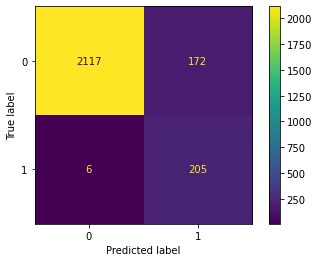

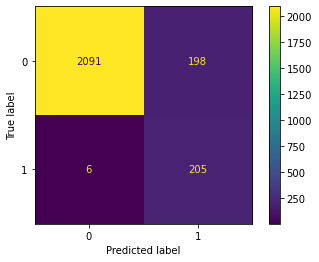

In [187]:
# Sag and Saga solvers crashed with big class_weights
params = {
    'C': [100000, 10000, 100, 1, 0.1, 0.01],
    'solver': ['newton-cg', 'lbfgs'],
    'class_weight': [{1.0: 0.5}, {1.0: 1}, {1.0: 2}, {1.0: 4}, {1.0: 8}, {1.0: 16}]
}
param_grid = {'logisticregression__' + key: params[key] for key in params}
grid_search_train_and_test('lr_weight_1p', normal_pipeline, param_grid,
                            inputs_train, labels_train, inputs_test, labels_test)
grid_search_train_and_test('lr_selected_weight_1p', normal_pipeline, param_grid,
                            inputs_train_selected, labels_train_selected, inputs_test_selected, labels_test_selected)

As it is evident, when using SMOTE the best result is obtained using smaller class_weights for the class previously in minority compared to normal training set.

Now, we are going to test with a bigger chunk of the dataset and less parameter options.

#### 10 Percent data set

**Logistic Regression with Smote - 10 Percent**

In [188]:
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs_10p, labels_10p, random_state=42)
inputs_train_selected, inputs_test_selected, labels_train_selected, labels_test_selected = train_test_split(inputs_10p_selected, labels_10p, random_state=42)

Testing...
lr_smoted_10p best score: 0.9403949233034661
lr_smoted_10p best parameters: {'logisticregression__C': 10000, 'logisticregression__class_weight': {1.0: 2}, 'logisticregression__solver': 'newton-cg'}
lr_smoted_10p roc_auc score against test set: 0.9459873021034743
lr_smoted_10p recall score against test set: 0.984691580369203
lr_smoted_10p precision score against test set: 0.5087229588276343
lr_smoted_10p accuracy score against test set: 0.91416
lr_smoted_10p balanced accuracy score against test set: 0.9459873021034741

Testing...
lr_selected_smoted_10p best score: 0.9377203792879956
lr_selected_smoted_10p best parameters: {'logisticregression__C': 10000, 'logisticregression__class_weight': {1.0: 1}, 'logisticregression__solver': 'newton-cg'}
lr_selected_smoted_10p roc_auc score against test set: 0.9417124993618081
lr_selected_smoted_10p recall score against test set: 0.9482215218370104
lr_selected_smoted_10p precision score against test set: 0.5879396984924623
lr_selected_smo

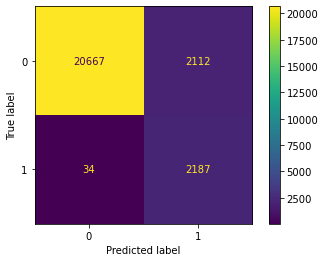

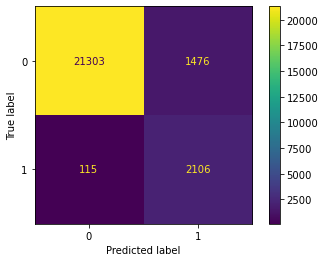

In [189]:
params = {
    'C': [10000, 100, 1,],
    'solver': ['newton-cg', 'lbfgs'],
    'class_weight': [{1.0: 1}, {1.0: 2}]
}
param_grid = {'logisticregression__' + key: params[key] for key in params}
grid_search_train_and_test('lr_smoted_10p', smote_pipeline, param_grid,
                            inputs_train, labels_train, inputs_test, labels_test)
grid_search_train_and_test('lr_selected_smoted_10p', smote_pipeline, param_grid,
                            inputs_train_selected, labels_train_selected, inputs_test_selected, labels_test_selected)

**Logistic Regression focusing on Class Weights - 10 Percent**

Testing...
lr_weight_10p best score: 0.9436530042684851
lr_weight_10p best parameters: {'logisticregression__C': 100000, 'logisticregression__class_weight': {1.0: 16}, 'logisticregression__solver': 'newton-cg'}
lr_weight_10p roc_auc score against test set: 0.9466318387400704
lr_weight_10p recall score against test set: 0.9747861323728051
lr_weight_10p precision score against test set: 0.5382894082545997
lr_weight_10p accuracy score against test set: 0.92348
lr_weight_10p balanced accuracy score against test set: 0.9466318387400704

Testing...
lr_weight_selected_10p best score: 0.9420552683791105
lr_weight_selected_10p best parameters: {'logisticregression__C': 10000, 'logisticregression__class_weight': {1.0: 16}, 'logisticregression__solver': 'newton-cg'}
lr_weight_selected_10p roc_auc score against test set: 0.9445291710124488
lr_weight_selected_10p recall score against test set: 0.9716343989194057
lr_weight_selected_10p precision score against test set: 0.5342906660064373
lr_weight_s

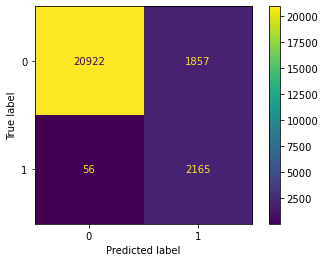

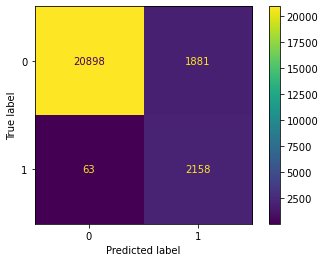

In [190]:
# Sag and Saga solvers crashed with big class_weights
params = {
    'C': [100000, 10000, 1000, 100],
    'solver': ['newton-cg', 'lbfgs'],
    'class_weight': [{1.0: 4}, {1.0: 8}, {1.0: 16}]
}
param_grid = {'logisticregression__' + key: params[key] for key in params}
grid_search_train_and_test('lr_weight_10p', normal_pipeline, param_grid,
                            inputs_train, labels_train, inputs_test, labels_test)
grid_search_train_and_test('lr_weight_selected_10p', normal_pipeline, param_grid,
                            inputs_train_selected, labels_train_selected, inputs_test_selected, labels_test_selected)

Finally, we will test our model with the, best parameters with the whole dataset. We will also opt out of using the dataset with the missing column as it seems to slightly inder the performance of the model.

#### Full data set

Although solver newton-cg gave better results, lbfgs was chosen due to a problem where newton solver would not converge with the full dataset.

**Logistic Regression Control - Full Dataset**

Testing...
lr_control_full best score: 0.7958779032432606
lr_control_full best parameters: {}
lr_control_full roc_auc score against test set: 0.7960766492827275
lr_control_full recall score against test set: 0.5991629104958146
lr_control_full precision score against test set: 0.890613249470158
lr_control_full accuracy score against test set: 0.95874
lr_control_full balanced accuracy score against test set: 0.7960766492827276



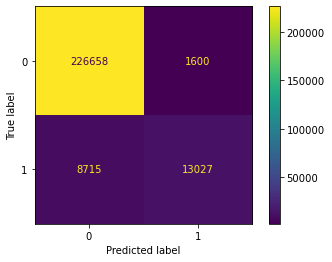

In [191]:
params = {}
param_grid = {'logisticregression__' + key: params[key] for key in params}
grid_search_train_and_test('lr_control_full', LogisticRegression(), param_grid,
                            all_inputs_train, all_labels_train, all_inputs_test, all_labels_test)

**Logistic Regression with Smote - Full Dataset**

Testing...
lr_smoted_full best score: 0.9420782745949499
lr_smoted_full best parameters: {'logisticregression__C': 10000, 'logisticregression__class_weight': {1.0: 2}, 'logisticregression__solver': 'newton-cg'}
lr_smoted_full roc_auc score against test set: 0.9430691125692261
lr_smoted_full recall score against test set: 0.9806365559746113
lr_smoted_full precision score against test set: 0.49709729313842066
lr_smoted_full accuracy score against test set: 0.912036
lr_smoted_full balanced accuracy score against test set: 0.9430691125692261



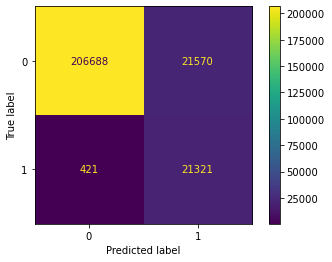

In [192]:
params = {
    'C': [10000],
    'solver': ['newton-cg'],
    'class_weight': [{1.0: 2}]
}
param_grid = {'logisticregression__' + key: params[key] for key in params}
grid_search_train_and_test('lr_smoted_full', smote_pipeline, param_grid,
                            all_inputs_train, all_labels_train, all_inputs_test, all_labels_test)

**Logistic Regression focusing on Class Weights - Full Dataset**

Testing...
lr_weight_full best score: 0.9436282175792761
lr_weight_full best parameters: {'logisticregression__C': 10000, 'logisticregression__class_weight': {1.0: 16}, 'logisticregression__solver': 'newton-cg'}
lr_weight_full roc_auc score against test set: 0.9442897817031476
lr_weight_full recall score against test set: 0.9729095759359765
lr_weight_full precision score against test set: 0.5235631899410921
lr_weight_full accuracy score against test set: 0.920648
lr_weight_full balanced accuracy score against test set: 0.9442897817031476



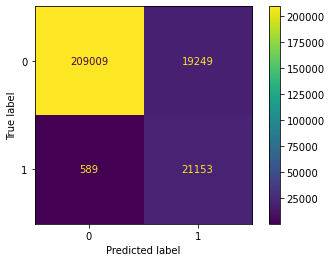

In [193]:
params = {
    'C': [10000],
    'solver': ['newton-cg'],
    'class_weight': [{1.0: 16}]
}
param_grid = {'logisticregression__' + key: params[key] for key in params}
grid_search_train_and_test('lr_weight_full', normal_pipeline, param_grid,
                            all_inputs_train, all_labels_train, all_inputs_test, all_labels_test)

Logistic Regression as proven to not be too valuable of an algorithm. Although it has a good recall, its precision is very bad. Eventhough precision is not a good assessment method for imbalanced data sets, such a low value is a bad sign, as the model would label many normal transactions as fraudulent.

---------------------------

### MyLogisticRegression

Logistic Regression but with altered threshold

In [194]:
class MyLogisticRegression(LogisticRegression):
    def predict(self, X):
        results = []
        scores = self.predict_proba(X)
        for element in scores:
            if element[0] > 0.7:
                results.append(0)
            else:
                results.append(1)
        return results

In [195]:
smote_pipeline = make_pipeline(SMOTE(random_state=42),
                              MinMaxScaler(),
                              MyLogisticRegression(max_iter=400000, n_jobs=4))
normal_pipeline = make_pipeline(MinMaxScaler(),
                              MyLogisticRegression(max_iter=400000, n_jobs=4))

#### Full data set

**Logistic Regression with Smote - Full Dataset**

Testing...
mylr_smoted_full best score: 0.9187589837207207
mylr_smoted_full best parameters: {'mylogisticregression__C': 10000, 'mylogisticregression__class_weight': {1.0: 2}, 'mylogisticregression__solver': 'newton-cg'}
mylr_smoted_full roc_auc score against test set: 0.9185489344214317
mylr_smoted_full recall score against test set: 0.9913531413853371
mylr_smoted_full precision score against test set: 0.3797124938341202
mylr_smoted_full accuracy score against test set: 0.858408
mylr_smoted_full balanced accuracy score against test set: 0.9185489344214317



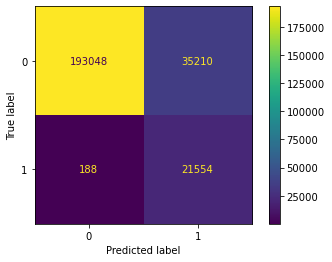

In [196]:
params = {
    'C': [10000],
    'solver': ['newton-cg'],
    'class_weight': [{1.0: 2}]
}
param_grid = {'mylogisticregression__' + key: params[key] for key in params}
grid_search_train_and_test('mylr_smoted_full', smote_pipeline, param_grid,
                            all_inputs_train, all_labels_train, all_inputs_test, all_labels_test)

**Logistic Regression focusing on Class Weights - Full Dataset**

Testing...
mylr_weight_full best score: 0.9239574885661691
mylr_weight_full best parameters: {'mylogisticregression__C': 10000, 'mylogisticregression__class_weight': {1.0: 16}, 'mylogisticregression__solver': 'newton-cg'}
mylr_weight_full roc_auc score against test set: 0.92364636293738
mylr_weight_full recall score against test set: 0.989605372090884
mylr_weight_full precision score against test set: 0.39844444444444443
mylr_weight_full accuracy score against test set: 0.86916
mylr_weight_full balanced accuracy score against test set: 0.9236463629373801



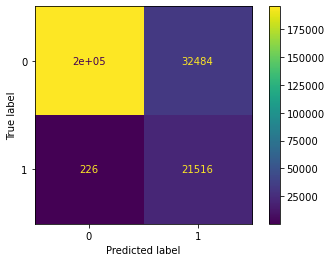

In [197]:
params = {
    'C': [10000],
    'solver': ['newton-cg'],
    'class_weight': [{1.0: 16}]
}
param_grid = {'mylogisticregression__' + key: params[key] for key in params}
grid_search_train_and_test('mylr_weight_full', normal_pipeline, param_grid,
                            all_inputs_train, all_labels_train, all_inputs_test, all_labels_test)

After these experiments, we concluded changing the threshold would not improve the situation that much.

### K-Nearest Neighbours

KNN is one of the simplest classification algorithms and usually proves to be powerful as well. However, it can be very memory itensive and slow.

In [198]:
smote_pipeline = make_pipeline(SMOTE(random_state=42),
                              MinMaxScaler(),
                              KNeighborsClassifier())
normal_pipeline = make_pipeline(MinMaxScaler(),
                              KNeighborsClassifier())

#### 1 Percent data set

In [199]:
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs_1p, labels_1p, random_state=42)

**K-Nearest Neighbours with Smote - 1 Percent**

Testing...
knn_smoted_1p best score: 0.9848597105405291
knn_smoted_1p best parameters: {'kneighborsclassifier__algorithm': 'brute', 'kneighborsclassifier__n_neighbors': 8, 'kneighborsclassifier__weights': 'distance'}
knn_smoted_1p roc_auc score against test set: 0.979295166042416
knn_smoted_1p recall score against test set: 0.9620853080568721
knn_smoted_1p precision score against test set: 0.9620853080568721
knn_smoted_1p accuracy score against test set: 0.9936
knn_smoted_1p balanced accuracy score against test set: 0.979295166042416



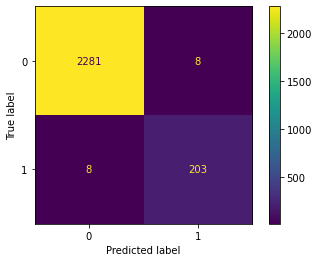

In [200]:
#We did not tune leaf_size because changing the leaf size can have great impact in runtime
# with little to no impact on performance metrics
params = {
    'n_neighbors': [5, 6, 7, 8, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['brute', 'ball_tree', 'kd_tree']
}
param_grid = {'kneighborsclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('knn_smoted_1p', smote_pipeline, param_grid,
                            inputs_train, labels_train, inputs_test, labels_test)

**K-Nearest Neighbours no data processing - 1 Percent**

Testing...
knn_none_1p best score: 0.974554384409877
knn_none_1p best parameters: {'kneighborsclassifier__algorithm': 'brute', 'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform'}
knn_none_1p roc_auc score against test set: 0.9706902370496439
knn_none_1p recall score against test set: 0.943127962085308
knn_none_1p precision score against test set: 0.9802955665024631
knn_none_1p accuracy score against test set: 0.9936
knn_none_1p balanced accuracy score against test set: 0.970690237049644



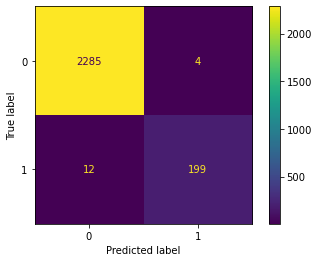

In [201]:
params = {
    'n_neighbors': [1, 2, 3, 4, 5],
    'weights': ['uniform', 'distance'],
    'algorithm': ['brute', 'ball_tree', 'kd_tree']
}
param_grid = {'kneighborsclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('knn_none_1p', normal_pipeline, param_grid,
                            inputs_train, labels_train, inputs_test, labels_test)

#### 10 Percent data set

Because KNN is very slow we couldn't use the 25% train 75% test rule. We splitted the whole dataset in 10% train 90% test and used the best parameters that had the best performance with 1% of the dataset.

In [202]:
inputs_train, inputs_test, labels_train, labels_test = train_test_split(all_inputs, all_labels, test_size=0.90, random_state=42)

**K-Nearest Neighbours Control - 10 Percent data set**

In [203]:
params = {}
param_grid = {'kneighborsclassifier__' + key: params[key] for key in params}
# Commented because it takes to long to predict
# grid_search_train_and_test('knn_control_10p', KNeighborsClassifier(), param_grid,
#                            inputs_train, labels_train, inputs_test, labels_test)

**K-Nearest Neighbours with Smote - 10 Percent data set**

In [204]:
params = {
    'n_neighbors': [8],
    'weights': ['distance'],
    'algorithm': ['brute']
}
param_grid = {'kneighborsclassifier__' + key: params[key] for key in params}
# Commented because it takes to long to predict
#grid_search_train_and_test('knn_smoted_10p', smote_pipeline, param_grid,
#                           inputs_train, labels_train, inputs_test, labels_test)

**K-Nearest Neighbours no data processing - 10 Percent data set**

In [205]:
params = {
    'n_neighbors': [1],
    'weights': ['uniform'],
    'algorithm': ['brute'],
}
param_grid = {'kneighborsclassifier__' + key: params[key] for key in params}
# Commented because it takes to long to predict
# grid_search_train_and_test('knn_none_10p', normal_pipeline, param_grid,
#                             inputs_train, labels_train, inputs_test, labels_test)

KNN achieved good results but it is much slower than other algorithms, making it very inviable to even fit with the full data set.

---------------------------

### Decision Trees

Decision trees have proven to be one of the most viable options when it comes to imbalanced data sets. Not only that but the algorithm deals well with irrelevant features. As such, we will not use the selected dataset.

In [206]:
smote_pipeline = make_pipeline(SMOTE(random_state=42),
                              MinMaxScaler(),
                              DecisionTreeClassifier(random_state=42))
normal_pipeline = make_pipeline(MinMaxScaler(),
                              DecisionTreeClassifier(random_state=42))

#### 1 Percent data set

In [207]:
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs_1p, labels_1p, random_state=42)

**Decision Tree Classifier with Smote - 1 Percent**

Testing...
dt_smoted_1p best score: 0.9944660176927546
dt_smoted_1p best parameters: {'decisiontreeclassifier__class_weight': {1.0: 4}, 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__splitter': 'best'}
dt_smoted_1p roc_auc score against test set: 0.9971934597570493
dt_smoted_1p recall score against test set: 0.995260663507109
dt_smoted_1p precision score against test set: 0.9905660377358491
dt_smoted_1p accuracy score against test set: 0.9988
dt_smoted_1p balanced accuracy score against test set: 0.9971934597570494



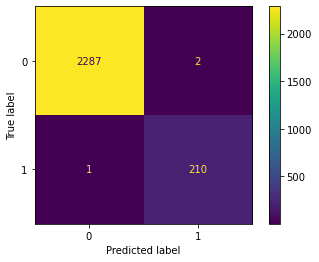

In [208]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'class_weight': [{1.0: 0.5}, {1.0: 1}, {1.0: 2}, {1.0: 4}, {1.0: 8}, {1.0: 16}, {1.0: 32}, {1.0: 64}],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 10, 20, 25, 30, 40, 80]    
}
param_grid = {'decisiontreeclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('dt_smoted_1p', smote_pipeline, param_grid,
                            inputs_train, labels_train, inputs_test, labels_test)

**Decision Tree Classifier focusing on Class Weights - 1 Percent**

Testing...
dt_weight_1p best score: 0.993299448681982
dt_weight_1p best parameters: {'decisiontreeclassifier__class_weight': {1.0: 4}, 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__splitter': 'best'}
dt_weight_1p roc_auc score against test set: 0.9952606635071091
dt_weight_1p recall score against test set: 0.990521327014218
dt_weight_1p precision score against test set: 1.0
dt_weight_1p accuracy score against test set: 0.9992
dt_weight_1p balanced accuracy score against test set: 0.9952606635071091



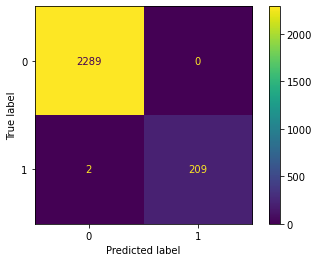

In [209]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'class_weight': [{1.0: 2}, {1.0: 4}, {1.0: 8}, {1.0: 16}, {1.0: 24},  {1.0: 32}, {1.0: 64}],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 10, 15, 20, 25, 30, 40, 80]
}
param_grid = {'decisiontreeclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('dt_weight_1p', normal_pipeline, param_grid,
                            inputs_train, labels_train, inputs_test, labels_test)

#### 10 Percent data set

In [210]:
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs_10p, labels_10p, random_state=42)

**Decision Tree Classifier with Smote - 10 Percent**

Testing...
dt_smoted_10p best score: 0.9995846429788429
dt_smoted_10p best parameters: {'decisiontreeclassifier__class_weight': {1.0: 8}, 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__splitter': 'best'}
dt_smoted_10p roc_auc score against test set: 0.9991709782537647
dt_smoted_10p recall score against test set: 0.9986492570914003
dt_smoted_10p precision score against test set: 0.9968539325842697
dt_smoted_10p accuracy score against test set: 0.9996
dt_smoted_10p balanced accuracy score against test set: 0.9991709782537646



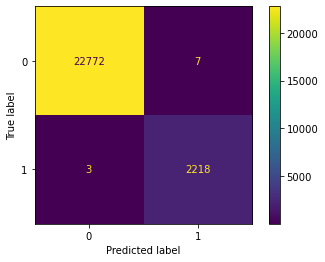

In [211]:
params = {
    'criterion': ['gini'],
    'splitter': ['best'],
    'class_weight': [{1.0: 1}, {1.0: 2}, {1.0: 4}, {1.0: 8}],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 10, 20]
    
}
param_grid = {'decisiontreeclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('dt_smoted_10p', smote_pipeline, param_grid,
                            inputs_train, labels_train, inputs_test, labels_test)

**Decision Tree Classifier focusing on Class Weights - 10 Percent**

Testing...
dt_weight_10p best score: 0.9995119542516837
dt_weight_10p best parameters: {'decisiontreeclassifier__class_weight': {1.0: 4}, 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__splitter': 'best'}
dt_weight_10p roc_auc score against test set: 0.999258778420585
dt_weight_10p recall score against test set: 0.9986492570914003
dt_weight_10p precision score against test set: 0.9986492570914003
dt_weight_10p accuracy score against test set: 0.99976
dt_weight_10p balanced accuracy score against test set: 0.9992587784205849



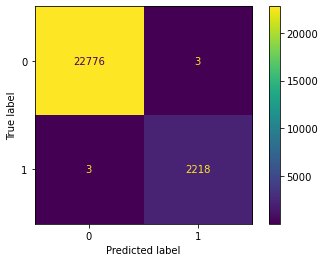

In [212]:
params = {
    'criterion': ['entropy'],
    'splitter': ['best'],
    'class_weight': [{1.0: 4}, {1.0: 8}, {1.0: 12}, {1.0: 16}],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [5, 10, 15, 20]
}
param_grid = {'decisiontreeclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('dt_weight_10p', normal_pipeline, param_grid,
                            inputs_train, labels_train, inputs_test, labels_test)

We will use the best parameters of this phase to train the model using the full dataset

#### Full data set

**Decision Tree Classifier Control - Full Dataset**

Testing...
dt_control_full best score: 0.9999354292739587
dt_control_full best parameters: {}
dt_control_full roc_auc score against test set: 0.9999518155674704
dt_control_full recall score against test set: 0.9999080121423972
dt_control_full precision score against test set: 0.9999540039556598
dt_control_full accuracy score against test set: 0.999988
dt_control_full balanced accuracy score against test set: 0.9999518155674704



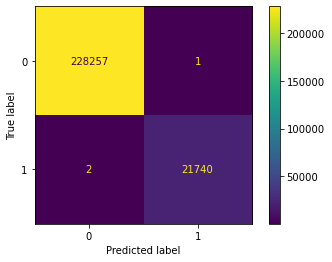

In [213]:
params = {}
param_grid = {'decisiontreeclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('dt_control_full', DecisionTreeClassifier(random_state=42), param_grid,
                            all_inputs_train, all_labels_train, all_inputs_test, all_labels_test)

**Decision Tree Classifier with Smote - Full Dataset**

Testing...
dt_smoted_full best score: 0.9999836174313554
dt_smoted_full best parameters: {'decisiontreeclassifier__class_weight': {1.0: 8}, 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__splitter': 'best'}
dt_smoted_full roc_auc score against test set: 0.9999222470918849
dt_smoted_full recall score against test set: 0.9998620182135958
dt_smoted_full precision score against test set: 0.9998160327461711
dt_smoted_full accuracy score against test set: 0.999972
dt_smoted_full balanced accuracy score against test set: 0.9999222470918849



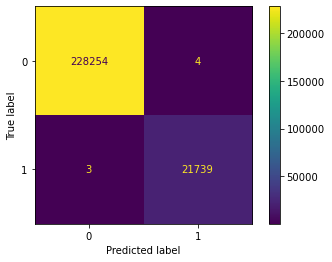

In [214]:
params = {
    'criterion': ['gini'],
    'splitter': ['best'],
    'class_weight': [{1.0: 8}],
    'max_features': [None],
    'max_depth': [10]
    
}
param_grid = {'decisiontreeclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('dt_smoted_full', smote_pipeline, param_grid,
                            all_inputs_train, all_labels_train, all_inputs_test, all_labels_test)

**Decision Tree Classifier focusing on Class Weights - Full Dataset**

Testing...
dt_weight_full best score: 0.9999528499798798
dt_weight_full best parameters: {'decisiontreeclassifier__class_weight': {1.0: 4}, 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__splitter': 'best'}
dt_weight_full roc_auc score against test set: 0.9999518155674704
dt_weight_full recall score against test set: 0.9999080121423972
dt_weight_full precision score against test set: 0.9999540039556598
dt_weight_full accuracy score against test set: 0.999988
dt_weight_full balanced accuracy score against test set: 0.9999518155674704



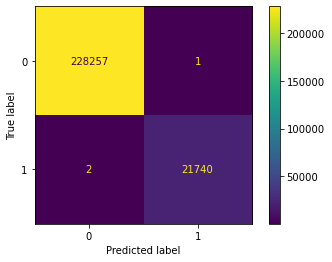

In [215]:
params = {
    'criterion': ['entropy'],
    'splitter': ['best'],
    'class_weight': [{1.0: 4}],
    'max_features': [None],
    'max_depth': [10]
}
param_grid = {'decisiontreeclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('dt_weight_full', normal_pipeline, param_grid,
                            all_inputs_train, all_labels_train, all_inputs_test, all_labels_test)

We can see that both models achieved great results and are not distinguishable. However, the one that didn't use SMOTE achieved the results faster. The scores are more than satisfactory, and the best ones yet.

---------------------------

### Multi-layer Perceptron classifier

Multi-layer Perceptron Classifier is a kind of Neural Network Classification algorithm. Neural Networks are usually very robust and worth the try.

In [216]:
smote_pipeline = make_pipeline(SMOTE(random_state=42),
                              MinMaxScaler(),
                              MLPClassifier(max_iter=10000, random_state=42))
normal_pipeline = make_pipeline(MinMaxScaler(),
                              MLPClassifier(max_iter=10000, random_state=42))

#### 1 Percent data set

In [217]:
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs_1p, labels_1p, random_state=42)

**Multi-layer Perceptron with Smote - 1 Percent**

Testing...
mlp_smote_1p best score: 0.9722984887351466
mlp_smote_1p best parameters: {}
mlp_smote_1p roc_auc score against test set: 0.9776667308516519
mlp_smote_1p recall score against test set: 0.976303317535545
mlp_smote_1p precision score against test set: 0.8110236220472441
mlp_smote_1p accuracy score against test set: 0.9788
mlp_smote_1p balanced accuracy score against test set: 0.9776667308516519



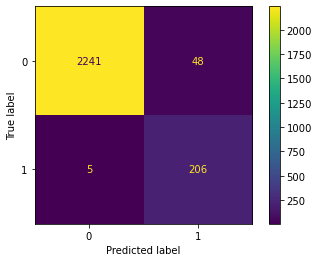

In [218]:
params = {}
param_grid = {'mlpclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('mlp_smote_1p', smote_pipeline, param_grid,
                            inputs_train, labels_train, inputs_test, labels_test)

**Multi-layer Perceptron Normal - 1 Percent**

Testing...
mlp_normal_1p best score: 0.9247660085644107
mlp_normal_1p best parameters: {}
mlp_normal_1p roc_auc score against test set: 0.9146588153936299
mlp_normal_1p recall score against test set: 0.8341232227488151
mlp_normal_1p precision score against test set: 0.9411764705882353
mlp_normal_1p accuracy score against test set: 0.9816
mlp_normal_1p balanced accuracy score against test set: 0.9146588153936299



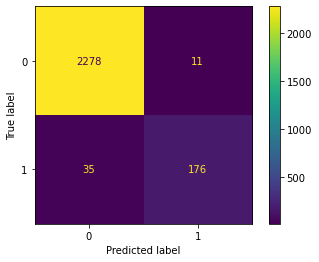

In [219]:
params = {}
param_grid = {'mlpclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('mlp_normal_1p', normal_pipeline, param_grid,
                            inputs_train, labels_train, inputs_test, labels_test)

#### 10 Percent data set

In [220]:
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs_10p, labels_10p, random_state=42)

**Multi-layer Perceptron with Smote - 10 Percent**

Testing...
mlp_smoted_10p best score: 0.9831718515064043
mlp_smoted_10p best parameters: {}
mlp_smoted_10p roc_auc score against test set: 0.9812519465714045
mlp_smoted_10p recall score against test set: 0.9909950472760019
mlp_smoted_10p precision score against test set: 0.772280701754386
mlp_smoted_10p accuracy score against test set: 0.97324
mlp_smoted_10p balanced accuracy score against test set: 0.9812519465714045



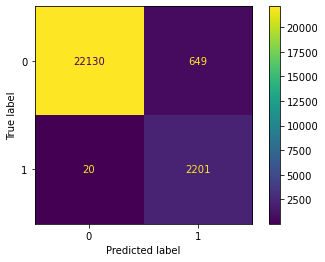

In [221]:
params = {}
param_grid = {'mlpclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('mlp_smoted_10p', smote_pipeline, param_grid,
                            inputs_train, labels_train, inputs_test, labels_test)

**Multi-layer Perceptron Normal - 10 Percent**

Testing...
mlp_normal_10p best score: 0.9999695412144115
mlp_normal_10p best parameters: {}
mlp_normal_10p roc_auc score against test set: 1.0
mlp_normal_10p recall score against test set: 1.0
mlp_normal_10p precision score against test set: 1.0
mlp_normal_10p accuracy score against test set: 1.0
mlp_normal_10p balanced accuracy score against test set: 1.0



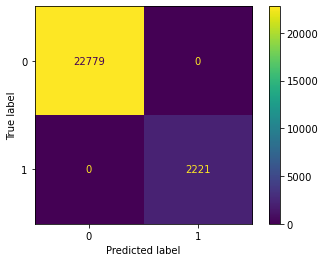

In [222]:
params = {}
param_grid = {'mlpclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('mlp_normal_10p', normal_pipeline, param_grid,
                            inputs_train, labels_train, inputs_test, labels_test)

Smote is showing worse results. As such, we will not use it with the full data set.

#### Full Data Set

Testing...
mlp_normal_full best score: 0.9764905063662332
mlp_normal_full best parameters: {}
mlp_normal_full roc_auc score against test set: 0.945036016866396
mlp_normal_full recall score against test set: 0.8920522491031184
mlp_normal_full precision score against test set: 0.9772257771955459
mlp_normal_full accuracy score against test set: 0.988804
mlp_normal_full balanced accuracy score against test set: 0.9450360168663959



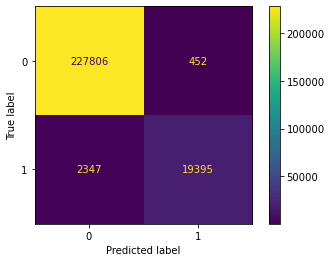

In [223]:
params = {}
param_grid = {'mlpclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('mlp_normal_full', normal_pipeline, param_grid,
                            all_inputs_train, all_labels_train, all_inputs_test, all_labels_test)

MLP is presenting very inconsistent results and takes very long time to train. As such, we conclude it is not the best algorithm to generate a model. Perhaps if we had more computanional power, we could explore more options in the grid search and obtain a decent model.

----------------------

### Random Forest Classifier

Random Forests, are like Decision Trees, robust against imbalanced data. They can also be an improvement as they are almost imune against overfitting and have a reduced error in comparison, making it perfect for this kind of problem. Although that was not a problem with the Decision Trees, we will give Random Forests a try.

In [224]:
smote_pipeline = make_pipeline(SMOTE(random_state=42),
                              MinMaxScaler(),
                              RandomForestClassifier(random_state=42))
normal_pipeline = make_pipeline(MinMaxScaler(),
                              RandomForestClassifier(random_state=42))

#### 1 Percent data set

In [225]:
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs_1p, labels_1p, random_state=42)
inputs_train_selected, inputs_test_selected, labels_train_selected, labels_test_selected = train_test_split(inputs_1p_selected, labels_1p, random_state=42)

**Random Forest Classifier with Smote - 1 Percent**

Testing...
rf_smoted_1p best score: 0.9936679585725349
rf_smoted_1p best parameters: {'randomforestclassifier__class_weight': {1.0: 1}, 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': None, 'randomforestclassifier__n_estimators': 150}
rf_smoted_1p roc_auc score against test set: 0.9971934597570493
rf_smoted_1p recall score against test set: 0.995260663507109
rf_smoted_1p precision score against test set: 0.9905660377358491
rf_smoted_1p accuracy score against test set: 0.9988
rf_smoted_1p balanced accuracy score against test set: 0.9971934597570494



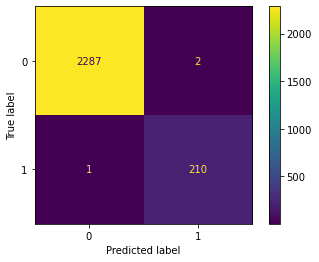

In [226]:
params = {
    'criterion': ['entropy'],
    'class_weight': [{1.0: 1}],
    'max_features': [None],
    'max_depth': [10],
    'n_estimators': [75, 100, 150, 200, 250]
}
# 75, 100, 150, 200, 250
# 5, 10, 20, 25
param_grid = {'randomforestclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('rf_smoted_1p', smote_pipeline, param_grid,
                            inputs_train, labels_train, inputs_test, labels_test)

**Random Forest Classifier focusing on Class Weights - 1 Percent**

Testing...
rf_weight_1p best score: 0.9918395168831754
rf_weight_1p best parameters: {'randomforestclassifier__class_weight': {1.0: 8}, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': None, 'randomforestclassifier__n_estimators': 75}
rf_weight_1p roc_auc score against test set: 0.9976303317535544
rf_weight_1p recall score against test set: 0.995260663507109
rf_weight_1p precision score against test set: 1.0
rf_weight_1p accuracy score against test set: 0.9996
rf_weight_1p balanced accuracy score against test set: 0.9976303317535544



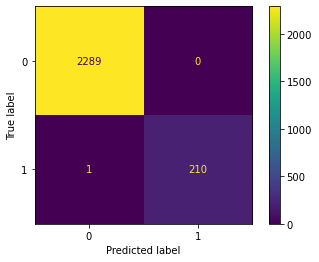

In [227]:
params = {
    'criterion': ['gini'],
    'class_weight': [{1.0: 8}],
    'max_features': [None],
    'max_depth': [10],
    'n_estimators': [75, 100, 150, 200, 250]
}
param_grid = {'randomforestclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('rf_weight_1p', normal_pipeline, param_grid,
                            inputs_train, labels_train, inputs_test, labels_test)

#### Full data set

**Random Forest Classifier Controll - Full Dataset**

Testing...
rf_control_full best score: 0.9999238524562373
rf_control_full best parameters: {}
rf_control_full roc_auc score against test set: 0.9999540060711987
rf_control_full recall score against test set: 0.9999080121423972
rf_control_full precision score against test set: 1.0
rf_control_full accuracy score against test set: 0.999992
rf_control_full balanced accuracy score against test set: 0.9999540060711987



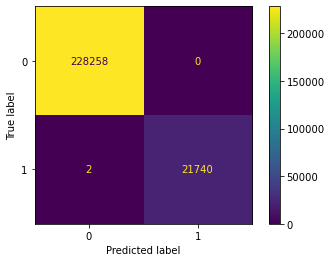

In [228]:
params = {}
param_grid = {'randomforestclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('rf_control_full', RandomForestClassifier(random_state=42), param_grid,
                            all_inputs_train, all_labels_train, all_inputs_test, all_labels_test)

**Random Forest Classifier with Smote - Full Dataset**

Although we got better results with 150 trees we estimated that running Random Forest with that number of trees would take 5 hours so we limited that number to 100.

Testing...
rf_smoted_full best score: 0.9999096617805113
rf_smoted_full best parameters: {'randomforestclassifier__class_weight': {1.0: 1}, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': None, 'randomforestclassifier__n_estimators': 10}
rf_smoted_full roc_auc score against test set: 0.9999496250637422
rf_smoted_full recall score against test set: 0.9999080121423972
rf_smoted_full precision score against test set: 0.9999080121423972
rf_smoted_full accuracy score against test set: 0.999984
rf_smoted_full balanced accuracy score against test set: 0.9999496250637421



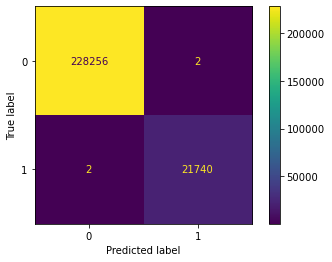

In [229]:
params = {
    'criterion': ['gini'],
    'class_weight': [{1.0: 1}],
    'max_features': [None],
    'max_depth': [10],
    'n_estimators': [10]
}
param_grid = {'randomforestclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('rf_smoted_full', smote_pipeline, param_grid,
                            all_inputs_train, all_labels_train, all_inputs_test, all_labels_test)

**Random Forest Classifier focusing on Class Weights - Full dataset**

Testing...
rf_weight_full best score: 0.9999535806108526
rf_weight_full best parameters: {'randomforestclassifier__class_weight': {1.0: 8}, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': None, 'randomforestclassifier__n_estimators': 75}
rf_weight_full roc_auc score against test set: 0.9999518155674704
rf_weight_full recall score against test set: 0.9999080121423972
rf_weight_full precision score against test set: 0.9999540039556598
rf_weight_full accuracy score against test set: 0.999988
rf_weight_full balanced accuracy score against test set: 0.9999518155674704



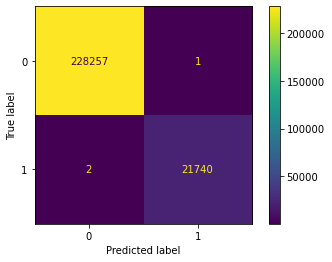

In [230]:
params = {
    'criterion': ['gini'],
    'class_weight': [{1.0: 8}],
    'max_features': [None],
    'max_depth': [10],
    'n_estimators': [75]
}
param_grid = {'randomforestclassifier__' + key: params[key] for key in params}
grid_search_train_and_test('rf_weight_full', normal_pipeline, param_grid,
                            all_inputs_train, all_labels_train, all_inputs_test, all_labels_test)

Random forests, similar to decision trees, generated very good results. However they were much slower to train and did not present much improvement, as Decision Trees are already nearly flawless for this dataset.

--------------------------

## Model Comparison and Analysis

In [231]:
performance_table = pd.read_csv('../data/performance.csv')
performance_table.sort_values('roc_auc', ascending=False)

,model,time_to_train,time_to_test,recall,roc_auc,precision,accuracy,balanced_accuracy
6,rf_control_full,361.549095,1.325936,0.999908,0.999954,1.000000,0.999992,0.999954
3,dt_control_full,12.073779,0.008223,0.999908,0.999952,0.999954,0.999988,0.999952
5,dt_weight_full,6.897408,0.015349,0.999908,0.999952,0.999954,0.999988,0.999952
8,rf_weight_full,303.098518,0.771723,0.999908,0.999952,0.999954,0.999988,0.999952
7,rf_smoted_full,132.806744,0.117373,0.999908,0.999950,0.999908,0.999984,0.999950
4,dt_smoted_full,26.156530,0.016174,0.999862,0.999922,0.999816,0.999972,0.999922
10,knn_smoted_10p,233.760107,181.564677,0.989553,0.993826,0.980322,0.997353,0.993826
11,knn_none_10p,119.013859,121.487901,0.983827,0.991484,0.990951,0.997803,0.991484
12,mlp_normal_full,960.845785,0.208947,0.892052,0.945036,0.977226,0.988804,0.945036
2,lr_weight_full,55.498035,0.018500,0.972910,0.944290,0.523563,0.920648,0.944290


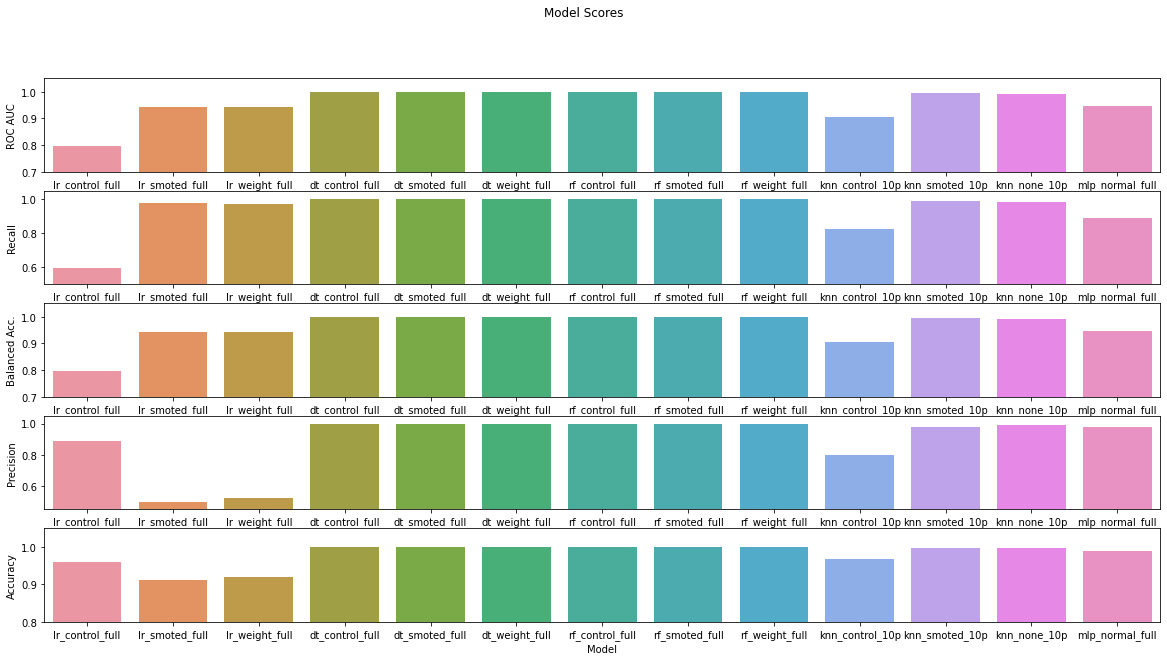

In [232]:
f, ax = plt.subplots(5, figsize=(20, 10)) 
sb.barplot(data=performance_table, x='model', y='roc_auc', ax=ax[0])
sb.barplot(data=performance_table, x='model', y='recall', ax=ax[1])
sb.barplot(data=performance_table, x='model', y='balanced_accuracy', ax=ax[2])
sb.barplot(data=performance_table, x='model', y='precision', ax=ax[3])
sb.barplot(data=performance_table, x='model', y='accuracy', ax=ax[4])
ax[0].set_ylim(ymin=0.7)
ax[1].set_ylim(ymin=0.5)
ax[2].set_ylim(ymin=0.7)
ax[3].set_ylim(ymin=0.45)
ax[4].set_ylim(ymin=0.8)
ax[0].set(ylabel = "ROC AUC")
ax[1].set(ylabel = "Recall")
ax[2].set(ylabel = "Balanced Acc.")
ax[3].set(ylabel = "Precision")
ax[4].set(ylabel = "Accuracy")
f.suptitle("Model Scores")
plt.xlabel("Model")
plt.show()

The graphs suggest that the models with the **best performance** are the ones based on **Decision Trees and Random Forests**. They had both outstanding scores, even without parameter tweeking. Decision Trees and Random Forests were the ones we predicted would have the best performance due to their tendency to behave well with imbalanced data sets. Even so, such a great result without any parameter tweeking was still a surprise.

It is also evident that **Logistic Regression** was the worse one, probably due to their sensitivity to imbalance. However, they were the most positively affected by the parameter tweeking (the last two scorers are not as suited to evaluate models in imbalanced datasets).

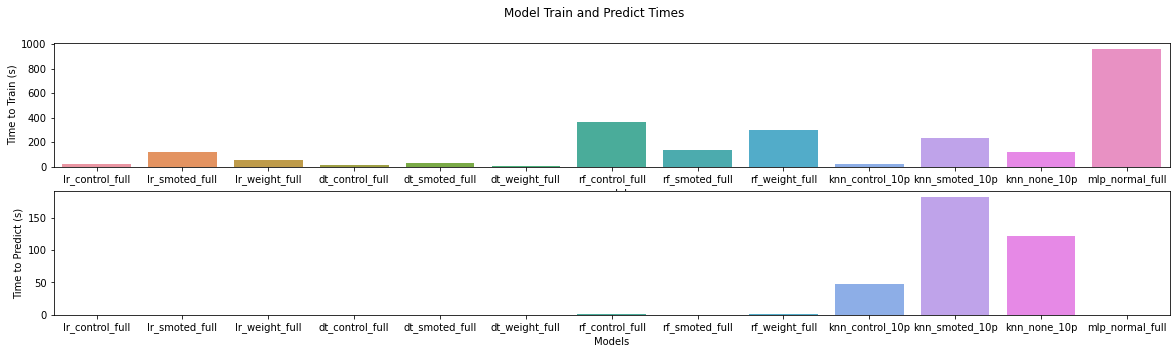

In [233]:
f, ax = plt.subplots(2, figsize=(20, 5)) 
sb.barplot(data=performance_table, x='model', y='time_to_train', ax=ax[0])
sb.barplot(data=performance_table, x='model', y='time_to_test', ax=ax[1])
ax[0].set(ylabel = "Time to Train (s)")
ax[1].set(ylabel = "Time to Predict (s)")
f.suptitle("Model Train and Predict Times")
plt.xlabel('Models')
plt.show()

These two graphs show us that
- although KNN had fairly decent scores, it is way too slow at predicting models
- Multi-layer Perceptrons was far slower than any other algorithm at training, which goes with expected
- Random Forests are far slower than Decision Trees, as many Decision Trees are formed in a Random Forest 

In [234]:
FINAL_CHOICE = unpickle_model('rf_control_full.sav')

## References

#### General
- [https://towardsdatascience.com/pros-and-cons-of-various-classification-ml-algorithms-3b5bfb3c87d6](https://towardsdatascience.com/pros-and-cons-of-various-classification-ml-algorithms-3b5bfb3c87d6)
- [https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7](https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7)
- [https://machinelearningmastery.com/cost-sensitive-logistic-regression/](https://machinelearningmastery.com/cost-sensitive-logistic-regression/)
- [https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/](https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/)
- [https://www.quora.com/Which-machine-learning-algorithms-tend-to-perform-better-on-highly-imbalanced-datasets](https://www.quora.com/Which-machine-learning-algorithms-tend-to-perform-better-on-highly-imbalanced-datasets)
- [https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)
- [https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/](https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/)
- [https://machinelearningmastery.com/what-is-imbalanced-classification/](https://machinelearningmastery.com/what-is-imbalanced-classification/)


#### Code
- [Scikit-Learn](https://scikit-learn.org/)
- [Seaborn](https://seaborn.pydata.org/)
- [Matplotlib](https://matplotlib.org/)
- [Pandas](https://pandas.pydata.org/)
- [Imblearn](https://imbalanced-learn.org/stable/)



#### Articles

- Tischio, R. M., & Weiss, G. M. (2019). Identifying classification algorithms most suitable for imbalanced data. Dept. Comput. Inf. Sci., Fordham Univ., The Bronx, NY, USA, Tech. Rep.
- Tharwat, A. (2021), ”Classification assessment methods”, Applied Computing and
Informatics, Vol. 17 No. 1, pp. 168-192.
- Bekkar, M., Djemaa, H. K., Alitouche, T. A. (2013). Evaluation measures for
models assessment over imbalanced data sets. J Inf Eng Appl, 3(10).